In [111]:
#Important imports for running code
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [112]:
Calibrations =['Data_Air_to_Glass_Labday_2.txt','Data_Glass_to_air_Labday_2.txt']

Air_to_Glass = np.loadtxt(Calibrations[0])
Glass_to_Air = np.loadtxt(Calibrations[1])

theta1_atg = Air_to_Glass[:, 0]
thetam_atg = Air_to_Glass[:, 1]

theta1_gta = Glass_to_Air[:, 0]
thetam_gta = Glass_to_Air[:, 1]

# Convert into radians
theta1_atg = theta1_atg * np.pi/180
theta1_gta = theta1_gta * np.pi/180
thetam_atg = thetam_atg * np.pi/180
thetam_gta = np.unwrap(thetam_gta,period=np.pi) * np.pi/180

theta1 = np.array([theta1_atg, theta1_gta])
thetam = np.array([thetam_atg, thetam_gta])

theta2_list = []

# Calculate real angle
for i in range(len(theta1)):
    theta2_list.append(theta1[i] - thetam[i])

theta2 = np.array(theta2_list)

In [113]:
theta1_atg_err = np.full_like(np.sin(theta1[0]), abs(np.sin(0.5 * np.pi/180)))
theta2_atg_err = np.full_like(np.sin(theta2[0]), abs(np.sin(0.5 * np.pi/180)))
theta1_gta_err = np.full_like(np.sin(theta1[1]), abs(np.sin(0.5 * np.pi/180)))
theta2_gta_err = np.full_like(np.sin(theta2[1]), abs(np.sin(0.5 * np.pi/180)))

In [114]:
#Fit for the code
def n_fit(theta1, n):
    return theta1 / n

n_guess = 1.5

AIR TO GLASS LAB DAY 2

The index of refraction for the glass is 1.5269 plusminus 0.007


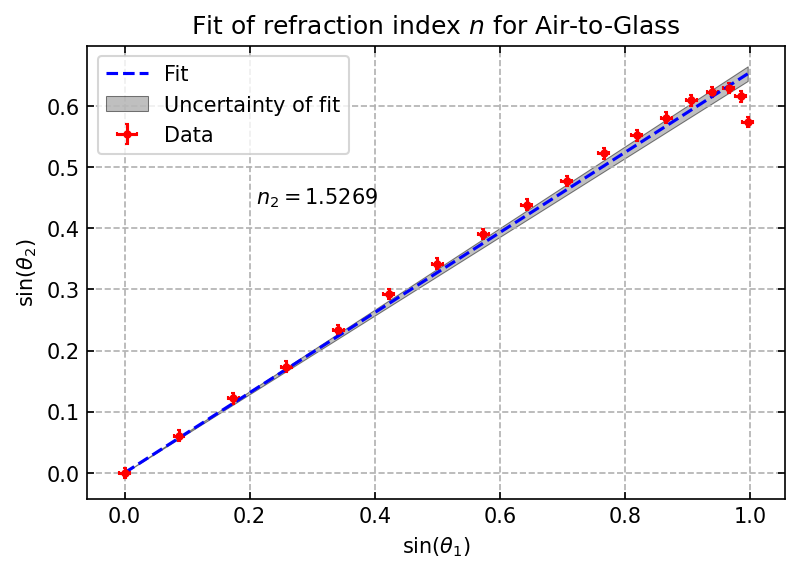

In [115]:
p_opt, p_cov = sp.curve_fit(n_fit, np.sin(theta1[0]), np.sin(theta2[0]), sigma = theta1_atg_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
# ax.plot(np.sin(theta1), np.sin(theta2), 'o', label='Data', color = 'tab:red')  # Plotting theta1 vs theta2
ax.errorbar(np.sin(theta1[0]), np.sin(theta2[0]), xerr = theta1_atg_err, yerr = theta2_atg_err, fmt = 'o', capsize=1, color='red', markersize=3, label='Data')
ax.plot(np.sin(theta1[0]), n_fit(np.sin(theta1[0]), p_opt[0]), '--', color= 'blue', label='Fit')  # Plotting the fit curve

ax.fill_between(np.sin(theta1[0]), n_fit(np.sin(theta1[0]), p_opt[0] - 4*np.sqrt(p_cov[0][0])), n_fit(np.sin(theta1[0]), p_opt[0] + 4* np.sqrt(p_cov[0][0])), 
                color = 'grey', alpha = 0.5, edgecolor = 'k', linewidth = 0.5, label = 'Uncertainty of fit')

ax.set_xlabel(r'$\sin(\theta_1)$')
ax.set_ylabel(r'$\sin(\theta_2)$')
ax.grid(ls = '--')
ax.set_title(r'Fit of refraction index $n$ for Air-to-Glass')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(0.21, 0.44, f'$n_2 = {round(p_opt[0], 4)}$')

print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt[0], 4), round(np.sqrt(p_cov[0][0]), 4)))
n_2_s = round(p_opt[0], 4)
plt.show()

GLASS TO AIR LAB DAY 2

The index of refraction for the glass is 0.9585 plusminus 0.0028


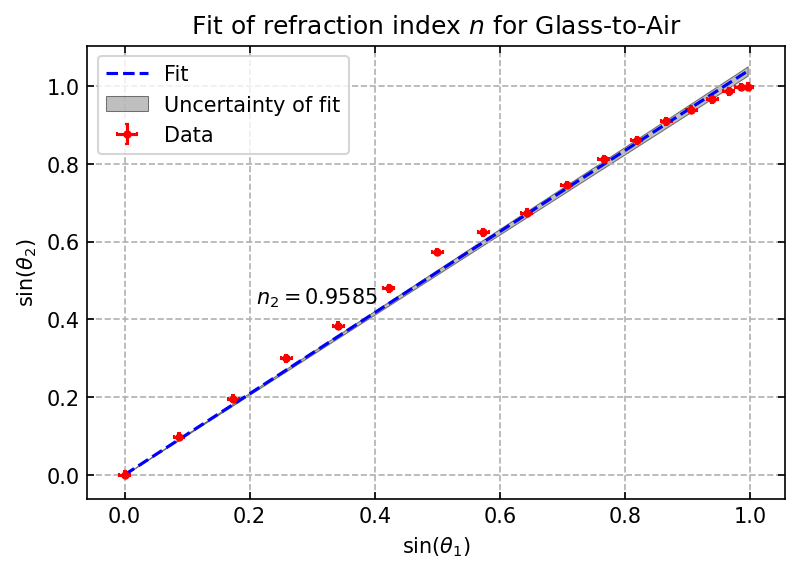

In [116]:
p_opt, p_cov = sp.curve_fit(n_fit, np.sin(theta1[1]), np.sin(theta2[1]), sigma = theta1_gta_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
# ax.plot(np.sin(theta1), np.sin(theta2), 'o', label='Data', color = 'tab:red')  # Plotting theta1 vs theta2
ax.errorbar(np.sin(theta1[1]), np.sin(theta2[1]), xerr = theta1_gta_err, yerr = theta2_gta_err, fmt = 'o', capsize=1, color='red', markersize=3, label='Data')
ax.plot(np.sin(theta1[1]), n_fit(np.sin(theta1[1]), p_opt[0]), '--', color= 'blue', label='Fit')  # Plotting the fit curve

ax.fill_between(np.sin(theta1[1]), n_fit(np.sin(theta1[1]), p_opt[0] - 4*np.sqrt(p_cov[0][0])), n_fit(np.sin(theta1[1]), p_opt[0] + 4* np.sqrt(p_cov[0][0])), 
                color = 'grey', alpha = 0.5, edgecolor = 'k', linewidth = 0.5, label = 'Uncertainty of fit')

ax.set_xlabel(r'$\sin(\theta_1)$')
ax.set_ylabel(r'$\sin(\theta_2)$')
ax.grid(ls = '--')
ax.set_title(r'Fit of refraction index $n$ for Glass-to-Air')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(0.21, 0.44, f'$n_2 = {round(p_opt[0], 4)}$')

print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt[0], 4), round(np.sqrt(p_cov[0][0]), 4)))
plt.show()

Comparing R+T=1

In [117]:
#Get data
#S_polarization_Labday2 =['S_Polirization_Labday_2.txt']
S_pol_L2 = np.loadtxt('S_Polarization_Labday_2.txt')

#Intensity of laser
E_0 = 3.4

#Intensity of transmitted and reflected light
E_1 = S_pol_L2[:,2]
E_2 = S_pol_L2[:,5]

In [118]:
#Getting the small r value
r_s = E_1/E_0
r_s

array([0.64705882, 0.64705882, 0.66764706, 0.64705882, 0.58823529,
       0.67647059, 0.63235294, 0.58823529, 0.64705882, 0.52941176,
       0.44117647, 0.38235294, 0.29411765, 0.23529412, 0.17647059,
       0.10588235, 0.04117647, 0.00176471])

In [119]:
#Getting the small t value
t_s = E_2/E_0
t_s

array([0.        , 0.        , 0.01176471, 0.01176471, 0.01294118,
       0.01764706, 0.02352941, 0.02941176, 0.03235294, 0.05882353,
       0.08235294, 0.10294118, 0.13823529, 0.17647059, 0.22352941,
       0.29411765, 0.5       , 0.47058824])

In [120]:
#Large R value:
R_s = r_s**2
R_s

array([4.18685121e-01, 4.18685121e-01, 4.45752595e-01, 4.18685121e-01,
       3.46020761e-01, 4.57612457e-01, 3.99870242e-01, 3.46020761e-01,
       4.18685121e-01, 2.80276817e-01, 1.94636678e-01, 1.46193772e-01,
       8.65051903e-02, 5.53633218e-02, 3.11418685e-02, 1.12110727e-02,
       1.69550173e-03, 3.11418685e-06])

In [121]:
#Import the angles measured:
theta1_s = S_pol_L2[:,0]
thetam_s = S_pol_L2[:,4]
#convert to radians:
theta1_s = theta1_s * np.pi/180
thetam_s = np.unwrap(thetam_s,period=np.pi) * np.pi/180

# Calculate real angle
theta2_s = theta1_s - thetam_s

In [122]:
#Large T value:

T_s = (np.cos(theta2_s)) / (np.cos(theta1_s)) *n_2_s *t_s**2
T_s

array([0.00000000e+00, 0.00000000e+00, 2.10608722e-04, 2.10846993e-04,
       2.55859605e-04, 4.74195685e-04, 8.47370705e-04, 1.31784131e-03,
       1.59563414e-03, 5.32606103e-03, 1.04712644e-02, 1.66270112e-02,
       3.06555123e-02, 5.15443576e-02, 8.65867073e-02, 1.61222042e-01,
       5.31480439e-01, 6.44767214e-01])

In [123]:
#Check if R+T holds:
total_s = R_s+T_s
total_s


array([0.41868512, 0.41868512, 0.4459632 , 0.41889597, 0.34627662,
       0.45808665, 0.40071761, 0.3473386 , 0.42028076, 0.28560288,
       0.20510794, 0.16282078, 0.1171607 , 0.10690768, 0.11772858,
       0.17243311, 0.53317594, 0.64477033])

In [124]:
#Difference from 1
D_s = 1- R_s - T_s
D_s

array([0.58131488, 0.58131488, 0.5540368 , 0.58110403, 0.65372338,
       0.54191335, 0.59928239, 0.6526614 , 0.57971924, 0.71439712,
       0.79489206, 0.83717922, 0.8828393 , 0.89309232, 0.88227142,
       0.82756689, 0.46682406, 0.35522967])

In [125]:
#Brewster angle
Brewster = np.arctan(n_2_s)

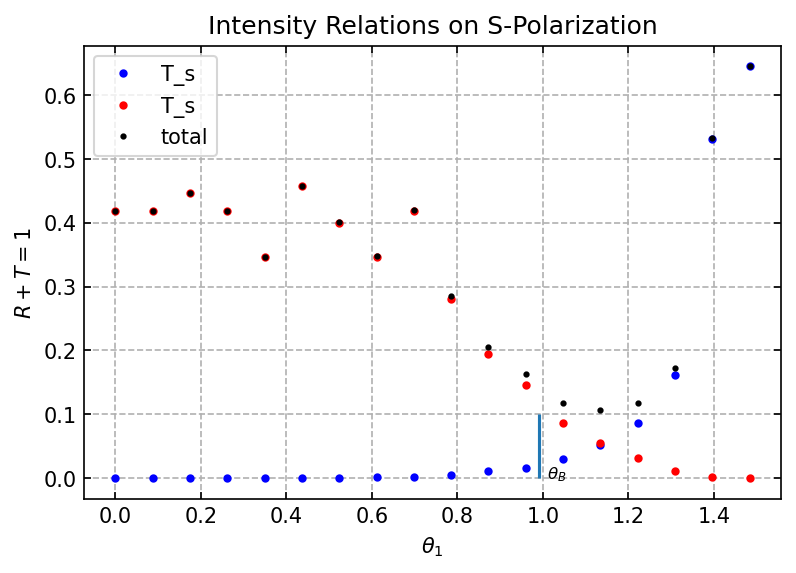

In [126]:
fig, ax = plt.subplots()

ax.plot(theta1_s, T_s, '.', color= 'blue',label = 'T_s')  # Plotting Transmitted Light
ax.plot(theta1_s, R_s, '.', color= 'red',label = 'T_s')  # Plotting Reflected Light
ax.plot(theta1_s, total_s, '.',markersize =4, color = 'black', label = 'total') #Plotting total light measured
ax.vlines(x = Brewster, ymin=0, ymax=0.1)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$ R + T = 1 $')
ax.grid(ls = '--')
ax.set_title(r'Intensity Relations on S-Polarization')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(1.01, 0.0, s=r"$\theta_{B}$", fontsize=8)
plt.show()